### Train Neural Networks with Augmentation

In [ ]:
#Import Necessary Libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Data Import, Preparation and Data Preprocessing and Data Augmentation
#Define transformation for the training set (With Data Augmentation)
train_transform = transforms.Compose([         #Use Compose for transformation Pipeline
    transforms.RandomHorizontalFlip(p=0.5),   #Data Augmentation tranformation
    transforms.RandomRotation(degrees=15),    #Data Augmentation transformation
    transforms.ToTensor(),                #PIL Image to Pytorch Tensor and scale as [0, 1]
    transforms.Normalize((0.5,), (0.5,))  #Normalize images to [-1, 1]
])

#Define transformation for the testing set (without data augmentation)
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

In [ ]:
#Download and Load the training data with data augmentation
train_dataset = torchvision.datasets.FashionMNIST(
    root='./data',              #Directory to store the dataset
    train=True,                 #Specifies the training set
    download=True,              #Download the dataset if not already present
    transform=train_transform   #Apply Transformation
    )

train_loader = torch.utils.data.DataLoader(
    train_dataset,      #Dataset to load
    batch_size=64,      #Number of samples per batch
    shuffle=True        #Shuffle the data at every epoch
)

#Download and load the test dataset without data augmentation
test_dataset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,
    download=True,
    transform=test_transform
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=64,
    shuffle=False
)

In [ ]:
#Understanding the data
#Map Neumaric labels to class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#Function to show an image
def imshow(img):
  img = img / 2 + 0.5   #Unnormalize the image
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)).squeeze(), cmap='gray')
  plt.axis('off')
  plt.show()

#Get Some random training image
dataiter = iter(train_loader)
images, labels = next(dataiter)
images

tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          ...,
          [-1.0000, -1.0000, -1.0000,  ...,  0.6941, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],


        [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
          [-1.0000, -1.000

In [ ]:
labels

tensor([5, 2, 4, 9, 8, 1, 2, 3, 8, 6, 3, 8, 4, 0, 0, 5, 5, 7, 4, 0, 2, 6, 2, 2,
        5, 4, 4, 9, 2, 4, 4, 6, 7, 4, 6, 5, 2, 7, 5, 7, 1, 0, 0, 5, 2, 6, 1, 8,
        0, 1, 5, 4, 2, 3, 6, 2, 6, 4, 2, 2, 9, 3, 9, 0])

Augmented Image


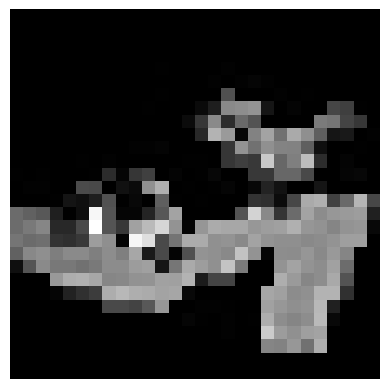

Label:  Sandal


In [ ]:
#Show one augmented image
print("Augmented Image")
imshow(images[0])
print("Label: ", classes[labels[0]])

tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 4, 8, 0, 2, 5, 7, 9,
        1, 4, 6, 0, 9, 3, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 6, 7, 2, 1,
        2, 2, 4, 4, 5, 8, 2, 2, 8, 4, 8, 0, 7, 7, 8, 5])
Original Test Image


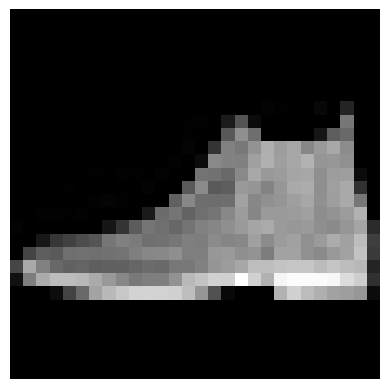

Labels:  Ankle boot


In [ ]:
#Get some random test images without augmentation
test_dataiter = iter(test_loader)
test_images, test_labels = next(test_dataiter)

print(test_labels)
#Get on original test image
print("Original Test Image")
imshow(test_images[0])
print("Labels: ", classes[test_labels[0]])

In [ ]:
#Visualizing Augmented Image
#Function to display a batch of images
def imshow_batch(img_batch, labels_batch, title):
  img_batch = img_batch / 2 + 0.5     #Unnormalize the image
  npimg = torchvision.utils.make_grid(img_batch, nrow=8)
  npimg = npimg.numpy()
  plt.figure(figsize=(12, 6))
  plt.imshow(np.transpose(npimg, (1, 2, 0)).squeeze(), cmap='gray')
  plt.title(title)
  plt.axis('off')
  plt.show()
  #Print Labels
  print('Label: ', ' '.join(f'{classes[labels_batch[j]]}' for j in range(len(labels_batch))))

Batch of Augmented Images


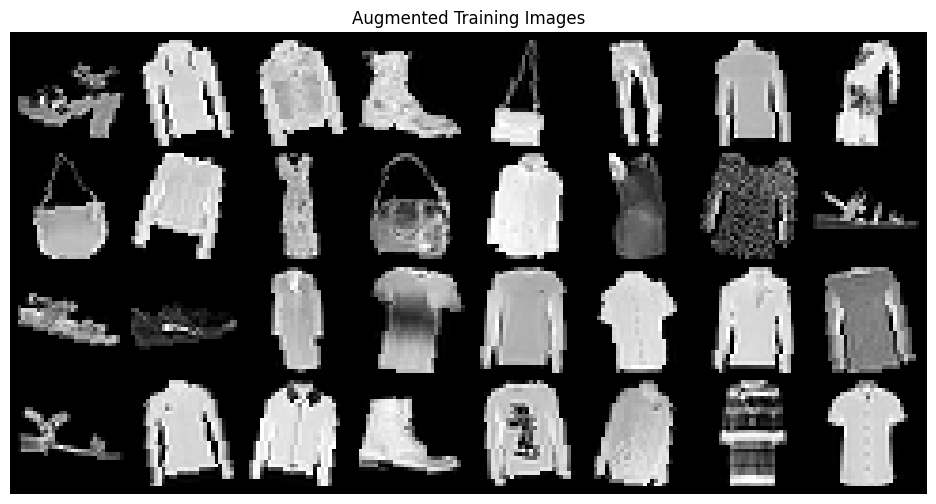

Label:  Sandal Pullover Coat Ankle boot Bag Trouser Pullover Dress Bag Shirt Dress Bag Coat T-shirt/top T-shirt/top Sandal Sandal Sneaker Coat T-shirt/top Pullover Shirt Pullover Pullover Sandal Coat Coat Ankle boot Pullover Coat Coat Shirt


In [ ]:
#Display a batch of augmented image
print("Batch of Augmented Images")
imshow_batch(images[:32], labels[:32], 'Augmented Training Images')

Batch of Original Test Images


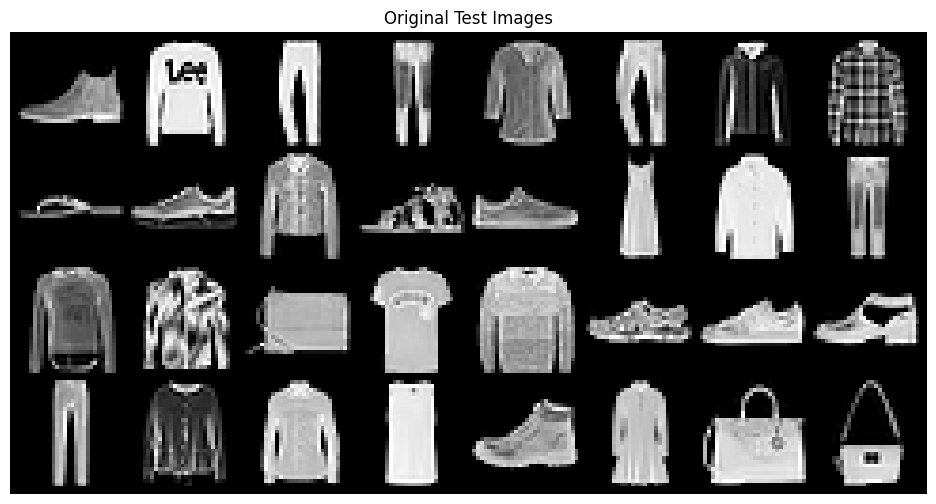

Label:  Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Shirt Sandal Sneaker Coat Sandal Sneaker Dress Coat Trouser Pullover Coat Bag T-shirt/top Pullover Sandal Sneaker Ankle boot Trouser Coat Shirt T-shirt/top Ankle boot Dress Bag Bag


In [ ]:
#Display a batch of original test images
print("Batch of Original Test Images")
imshow_batch(test_images[:32], test_labels[:32], 'Original Test Images')

### Defining the Neural Network with dropout

In [ ]:
class NetWithDropout(nn.Module):
  def __init__(self):
    super(NetWithDropout, self).__init__()

    self.fc1 = nn.Linear(28*28, 256)
    self.dropout1 = nn.Dropout(0.5)
    self.relu1 = nn.ReLU()

    self.fc2 = nn.Linear(256, 128)
    self.dropout2 = nn.Dropout(0.5)
    self.relu2 = nn.ReLU()

    self.fc3 = nn.Linear(128, 64)
    self.dropout3 = nn.Dropout(0.5)
    self.relu3 = nn.ReLU()

    self.fc4 = nn.Linear(64, 10)      #10 output class

  def forward(self, x):
    x = x.view(-1, 28*28)
    x = self.dropout1(self.relu1(self.fc1(x)))
    x = self.dropout2(self.relu2(self.fc2(x)))
    x = self.dropout3(self.relu3(self.fc3(x)))
    x = self.fc4(x)     #Output Layer (No activation, will use cross entropy loss)

    return x

#Initialize the network with dropout
net = NetWithDropout()

#Choosing the loss and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)


In [ ]:
#Train Parameters and variables
num_epochs = 10
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 3      #Early stopping patience
trigger_times = 0

#Training loop with early stopping
for epoch in range(num_epochs):
  net.train()     #Set the model to training mode
  running_train_loss = 0.0
  for inputs, labels in train_loader:
    optimizer.zero_grad()
    output = net(inputs)    #Forward Pass
    loss = criterion(output, labels)    #Compute loss
    loss.backward()     #Backward Pass
    optimizer.step()    #Update weights
    print(f'Train Loader: {loss.item()}')
    running_train_loss += loss.item()
  train_loss = running_train_loss / len(train_loader)
  train_losses.append(train_loss)


  net.eval()    #Set the model to evaluation model
  running_val_loss = 0.0
  with torch.no_grad():
    for inputs, labels in test_loader:
      output = net(inputs)
      loss = criterion(output, labels)
      print(f'Test Loader: {loss.item()}')
      running_val_loss += loss.item()
  val_loss = running_val_loss / len(test_loader)
  val_losses.append(val_loss)

  print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}')

  #Early Stopping
  if val_loss < best_val_loss:
    best_val_loss = val_loss
    trigger_times = 0
    #Save the model checkpoint
    torch.save(net.state_dict(), 'best_model.pth')
  else:
    trigger_times += 1
    if trigger_times > patience:
      print("Early Stopping")
      break


Streaming output truncated to the last 5000 lines.
Train Loader: 0.4863915741443634
Train Loader: 0.5636709928512573
Train Loader: 0.5158278942108154
Train Loader: 0.6303521394729614
Train Loader: 0.9734897613525391
Train Loader: 0.8532316088676453
Train Loader: 0.6155451536178589
Train Loader: 0.6069325804710388
Train Loader: 0.8263830542564392
Train Loader: 0.6620219349861145
Train Loader: 0.8292109966278076
Train Loader: 0.7364426851272583
Train Loader: 1.0190151929855347
Train Loader: 0.5844299793243408
Train Loader: 0.8387066125869751
Train Loader: 0.7118591666221619
Train Loader: 0.8385652303695679
Train Loader: 0.5071768760681152
Train Loader: 0.6858319044113159
Train Loader: 0.7366518378257751
Train Loader: 0.774176836013794
Train Loader: 0.5474972128868103
Train Loader: 0.8293013572692871
Train Loader: 0.7812497615814209
Train Loader: 0.7364664077758789
Train Loader: 0.753597617149353
Train Loader: 0.6835554242134094
Train Loader: 0.6894726753234863
Train Loader: 0.63797336816

In [ ]:
#Loading the best model
net.load_state_dict(torch.load('best_model.pth'))
print(train_losses)
print(val_losses)

[0.9704907843426093, 0.7522721472643078, 0.7174524292190955, 0.7022870363774838, 0.681765483704203, 0.6748463001205469, 0.6731347642791297]
[0.6199408784793441, 0.5953541377167793, 0.5354442746396277, 0.5565626145737945, 0.5596948943700001, 0.5630774949766268, 0.5694658281696829]


<ipython-input-40-041281f3e6dc>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load('best_model.pth'))


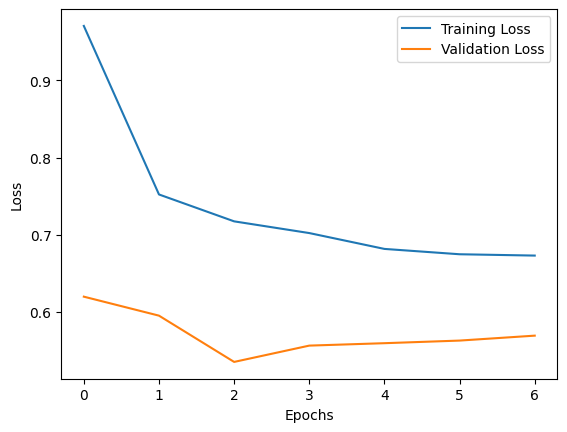

In [ ]:
#Plotting the loss
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Train CNN With Augmentation

In [ ]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F  # For activation functions
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 1. Data Import, Preparation, and Preprocessing with Data Augmentation

# Define transformations for the training set (with data augmentation)
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data to [-1, 1]
])

# Define transformations for the test set (without data augmentation)
test_transform = transforms.Compose([
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize((0.5,), (0.5,))  # Normalize the data to [-1, 1]
])

In [ ]:
# Download and load the training data with augmentation
trainset = torchvision.datasets.FashionMNIST(
    root='./data',        # Directory to store the dataset
    train=True,           # Specifies training set
    download=True,        # Downloads the dataset if not already present
    transform=train_transform   # Applies the transformations
)
trainloader = torch.utils.data.DataLoader(
    trainset,             # Dataset to load
    batch_size=64,        # Number of samples per batch
    shuffle=True          # Shuffle the data at every epoch
)

# Download and load the testing data (no augmentation)
testset = torchvision.datasets.FashionMNIST(
    root='./data',
    train=False,          # Specifies test set
    download=True,
    transform=test_transform
)
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=64,
    shuffle=False         # No need to shuffle test data
)

Augmented Image:


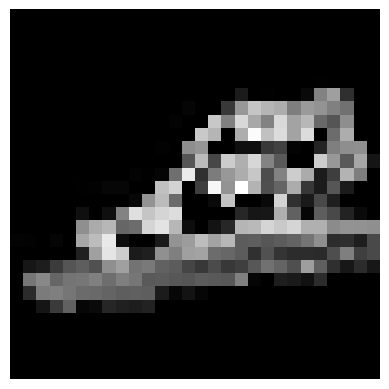

Label: Sandal


In [ ]:
# 2. Understanding the Data
# Map numeric labels to class names
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)).squeeze(), cmap='gray')
    plt.axis('off')
    plt.show()

# Get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Show one augmented image
print('Augmented Image:')
imshow(images[0])
print('Label:', classes[labels[0]])

Original Test Image:


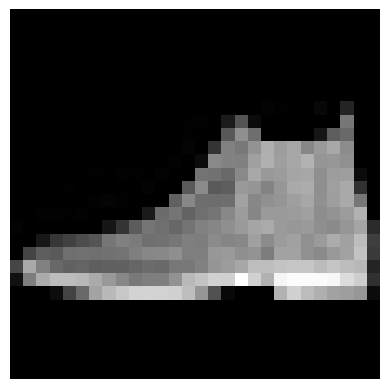

Label: Ankle boot


In [ ]:
# Get some random test images (without augmentation)
test_dataiter = iter(testloader)
test_images, test_labels = next(test_dataiter)

# Show one original test image
print('Original Test Image:')
imshow(test_images[0])
print('Label:', classes[test_labels[0]])


In [ ]:
# 3. Visualizing Augmented Images

# Function to display a batch of images
def imshow_batch(img_batch, labels_batch, title):
    img_batch = img_batch / 2 + 0.5  # Unnormalize
    npimg = torchvision.utils.make_grid(img_batch, nrow=8)
    npimg = npimg.numpy()
    plt.figure(figsize=(12, 6))
    plt.imshow(np.transpose(npimg, (1, 2, 0)).squeeze())
    plt.title(title)
    plt.axis('off')
    plt.show()
    # Print labels
    print('Labels:', ' '.join(f'{classes[labels_batch[j]]}' for j in range(len(labels_batch))))

Batch of Augmented Images:


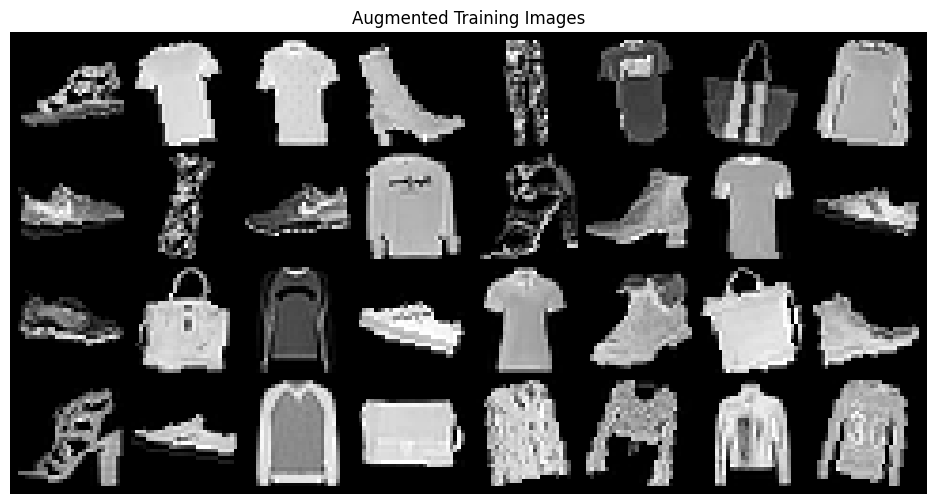

Labels: Sandal T-shirt/top T-shirt/top Ankle boot Trouser T-shirt/top Bag Shirt Sneaker Dress Sneaker Pullover Sandal Ankle boot T-shirt/top Sneaker Sneaker Bag Pullover Sneaker T-shirt/top Ankle boot Bag Ankle boot Sandal Sneaker Pullover Bag Shirt Shirt Coat Pullover


In [ ]:
# Display a batch of augmented images
print('Batch of Augmented Images:')
imshow_batch(images[:32], labels[:32], 'Augmented Training Images')

Batch of Original Test Images:


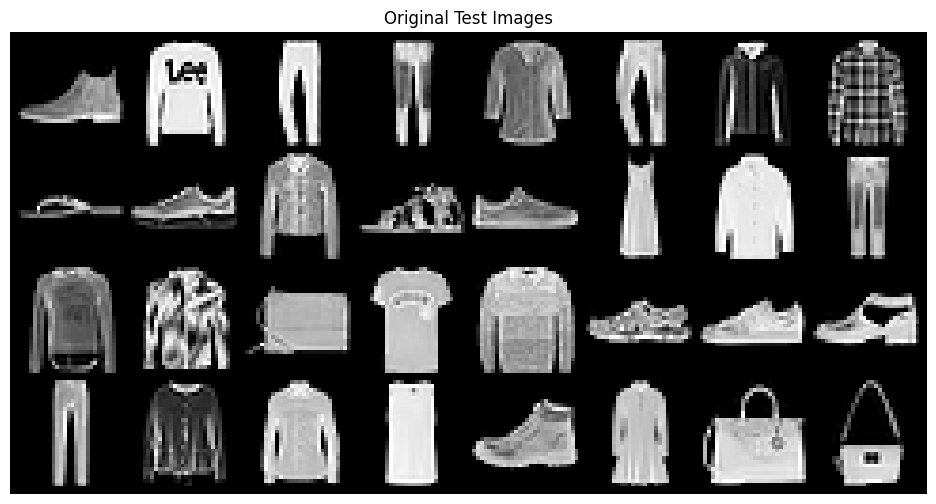

Labels: Ankle boot Pullover Trouser Trouser Shirt Trouser Coat Shirt Sandal Sneaker Coat Sandal Sneaker Dress Coat Trouser Pullover Coat Bag T-shirt/top Pullover Sandal Sneaker Ankle boot Trouser Coat Shirt T-shirt/top Ankle boot Dress Bag Bag


In [ ]:
# Display a batch of original test images
print('Batch of Original Test Images:')
imshow_batch(test_images[:32], test_labels[:32], 'Original Test Images')

### Defining the convolutional neural network with Dropout

In [ ]:
class CNNNet(nn.Module):
  def __init__(self):
    super(CNNNet, self).__init__()
    #Convolutional layer
    self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
    #Pooling Layer
    self.pool = nn.MaxPool2d(2, 2)  #(use Maxpooling to reduce spatial dimension)
    #dropout layers
    self.dropout_conv = nn.Dropout2d(0.5)
    self.dropout_fc = nn.Dropout2d(0.25)
    #Fully Connected Layer
    self.fc1 = nn.Linear(64*7*7, 128)
    self.fc2 = nn.Linear(128, 10)

  def forward(self, x):
    #Convolutional Layers with ReLU and Pooling
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = self.dropout_conv(x)
    x = x.view(-1, 64 * 7 * 7)
    x = F.relu(self.fc1(x))
    x = self.dropout_fc(x)
    x = self.fc2(x)

    return x

#Initialize the network
net = CNNNet()

#Choosing the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=0.001)

In [ ]:
#Training Parameters and Variables
num_epochs = 5
train_losses = []
val_losses = []
best_val_losses = float('inf')
patience = 3 #Early Stopping
trigger_times = 0

#Training Loop with Early Stopping
for epoch in range(num_epochs):
  net.train()
  running_train_loss = 0.0
  for inputs, labels in trainloader:
    optimizer.zero_grad()
    output = net(inputs)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    print(f"Train Loss: {loss.item()}")
    running_train_loss += loss.item()
  train_loss = running_train_loss / len(trainloader)
  train_losses.append(train_loss)

  net.eval()
  running_val_loss = 0.0
  with torch.no_grad():
    for inputs, labels in testloader:
      output = net(inputs)
      loss = criterion(output, labels)
      print(f"Val Loss: {loss.item()}")
      running_val_loss += loss.item()
    val_loss = running_val_loss / len(testloader)
    val_losses.append(val_loss)

  print(f'Epoch [{epoch+1} / {num_epochs}], Training Loss:{train_loss:.4f}, Validation Loss: {val_loss:.4f}')

  #Early Stopping
  if val_loss < best_val_losses:
    best_val_loss = val_loss
    trigger_times = 0
    #Save the model checkpoint
    torch.save(net.state_dict(), 'best_model.pth')
  else:
    trigger_times += 1
    if trigger_times > patience:
      print('Early Stopping')
      break

/usr/local/lib/python3.11/dist-packages/torch/nn/functional.py:1538: UserWarning: dropout2d: Received a 2-D input to dropout2d, which is deprecated and will result in an error in a future release. To retain the behavior and silence this warning, please use dropout instead. Note that dropout2d exists to provide channel-wise dropout on inputs with 2 spatial dimensions, a channel dimension, and an optional batch dimension (i.e. 3D or 4D inputs).
  warnings.warn(warn_msg)


Streaming output truncated to the last 5000 lines.
Train Loss: 0.36327314376831055
Train Loss: 0.4917130768299103
Train Loss: 0.47568073868751526
Train Loss: 0.5431749820709229
Train Loss: 0.44256219267845154
Train Loss: 0.693536639213562
Train Loss: 0.3773059844970703
Train Loss: 0.6060107350349426
Train Loss: 0.5656784176826477
Train Loss: 0.4385882019996643
Train Loss: 0.47389647364616394
Train Loss: 0.38814130425453186
Train Loss: 0.4306221008300781
Train Loss: 0.6200127005577087
Train Loss: 0.5734724402427673
Train Loss: 0.406135231256485
Train Loss: 0.4726550281047821
Train Loss: 0.4022471010684967
Train Loss: 0.5210537910461426
Train Loss: 0.32284340262413025
Train Loss: 0.5543093681335449
Train Loss: 0.4924658238887787
Train Loss: 0.48265379667282104
Train Loss: 0.5733562111854553
Train Loss: 0.5050860047340393
Train Loss: 0.41388869285583496
Train Loss: 0.33320948481559753
Train Loss: 0.47941648960113525
Train Loss: 0.5355556607246399
Train Loss: 0.4762728214263916
Train Loss:

In [ ]:
print(train_losses)
print(val_losses)

[0.4839705536678148, 0.4448734224478065, 0.4183944271984639, 0.40786998512457684, 0.39360738526592887]
[0.368186438918873, 0.3390969224036879, 0.340824889434371, 0.3323031276654286, 0.3295246310959196]


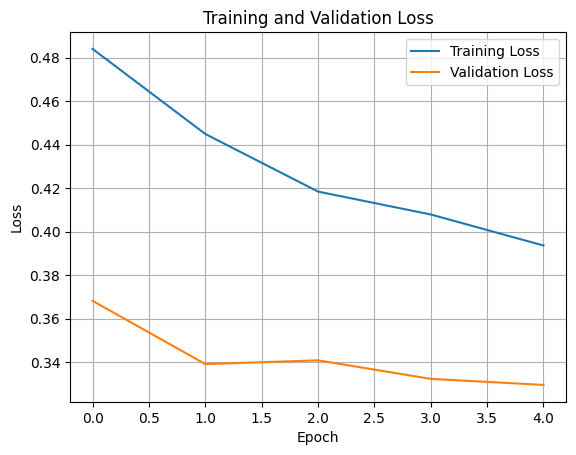

In [ ]:
#Plotting the losses
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Convolutional Neural Networks (CNN's)
Powerful deep networks that are widely used in image related tasks like - Image Recognition, Segmenation, Computer Vision etc Input to these networks are images!

<img src="https://i.postimg.cc/QCmC0vhZ/cnn2.jpg"
     alt="cnn2.jpg"
     style="width: 400px;" />


### Why another type of Networks?
Problem with Multilayer Perceptrons(MLP's)
<img src="https://i.postimg.cc/52T07Bdy/cnn.jpg"
     alt="nn.jpg"
     style="width: 400px;" />

- **Overfitting** due too many parameters(~millions), while working with medium-large sized images!
- Fail to handle variance in images - translation, rotation, illumination, size etc!


<img src="https://i.postimg.cc/X7vYnHnX/invariance.png"
     alt="pokemon_back.jpg"
     style="width: 400px;" />
        

###Why CNN's are special

##Some Image Processing

Let's have a look out this image!
<img src="https://i.postimg.cc/KzYH1Mj7/cat.jpg"
     alt="cat.jpg"
     style="width: 400px;" />

CNN know's this is a cat.
<img src="https://i.postimg.cc/4dFFVxHD/cat1.jpg"
     alt="cat.jpg"
     style="width: 400px;" />

Even this is a cat.
<img src="https://i.postimg.cc/C5BrNpjz/cat2.jpg"
     alt="cat.jpg"
     style="width: 400px;" />
This a cat too.
<img src="https://i.postimg.cc/LsDW4T96/cat3.jpg"
     alt="cat.jpg"
     style="width: 400px;" />
and this too!
<img src="https://i.postimg.cc/dV8XpFgC/cat4.jpg"
     alt="cat.jpg"
     style="width: 400px;" />


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2 #OpenCV lib

In [ ]:
img_path = "/content/drive/MyDrive/car1.jpeg"

In [ ]:
car1 = mpimg.imread(img_path)

In [ ]:
car1.shape

(326, 552, 4)

In [ ]:
type(car1)

numpy.ndarray

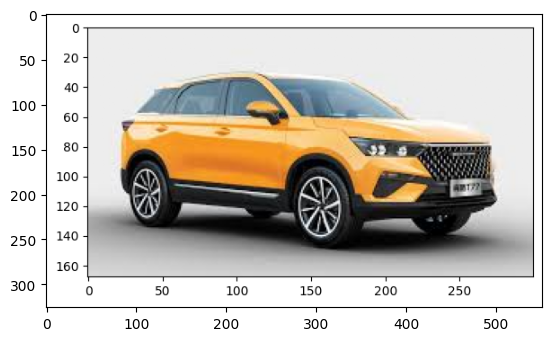

In [ ]:
plt.imshow(car1)

In [ ]:
car1[0][0]

array([1., 1., 1., 1.], dtype=float32)

In [ ]:
car1_cv2 = cv2.imread(img_path)

In [ ]:
car1_cv2.shape

(326, 552, 3)

In [ ]:
cv2.imshow(car1_cv2)

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


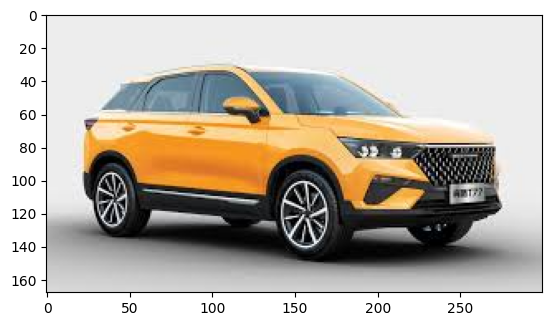

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(car1_cv2)

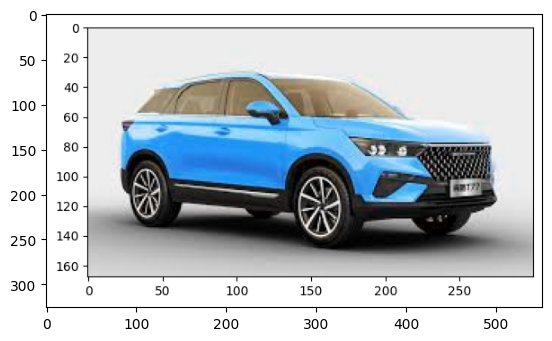

In [ ]:
plt.imshow(car1_cv2)

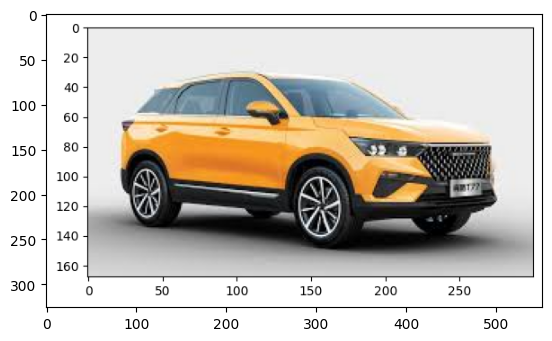

In [ ]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

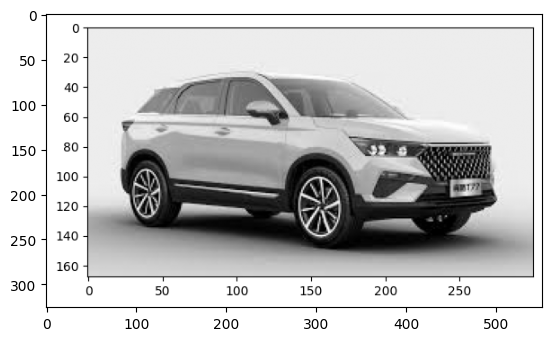

In [ ]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap='gray')

In [ ]:
car1_cv2_BGR_GRAY.shape

(326, 552)

In [ ]:
car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max()

(0, 255)

In [ ]:
def visualize_RGB_channel(imgArray=None, figsize=(10, 7)):
  #Splitting the RGB components
  B, G, R = cv2.split(imgArray)
  #Create zero matrix of shape of image
  Z = np.zeros(B.shape, dtype=B.dtype) #Use any channel

  #init subplots
  fig, ax = plt.subplots(2, 2, figsize=figsize)
  #Plotting the actual and RGB image
  [axi.set_axis_off() for axi in ax.ravel()]

  ax[0, 0].set_title("Original Image")
  ax[0, 0].imshow(cv2.merge((R, G, B)))

  ax[0, 1].set_title("Red Channel Image")
  ax[0,1].imshow(cv2.merge((R,Z,Z)))

  ax[1, 0].set_title("Green Channel Image")
  ax[1, 0].imshow(cv2.merge((Z, G, Z)))

  ax[1, 1].set_title("Blue Channel Image")
  ax[1, 1].imshow(cv2.merge((Z, Z, B)))

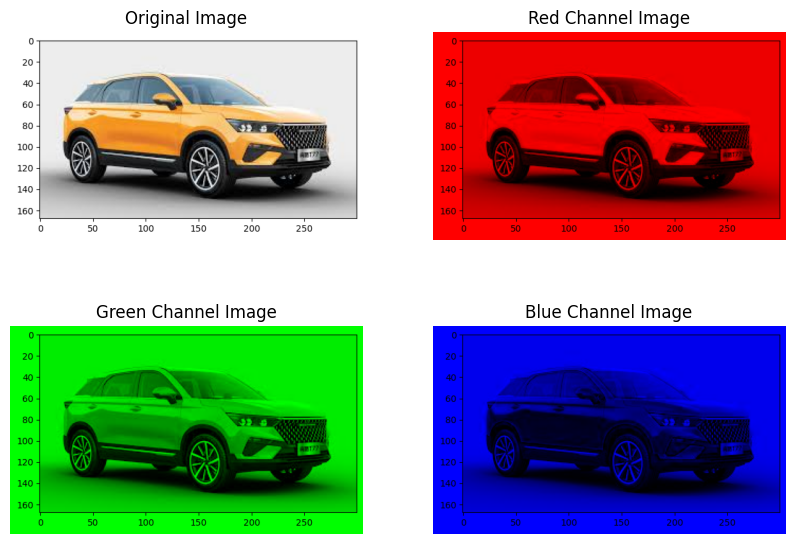

In [ ]:
visualize_RGB_channel(imgArray=car1_cv2)

In [ ]:
random_colored_img = np.random.randint(0, 255, (6, 6, 3))
random_colored_img.shape

(6, 6, 3)

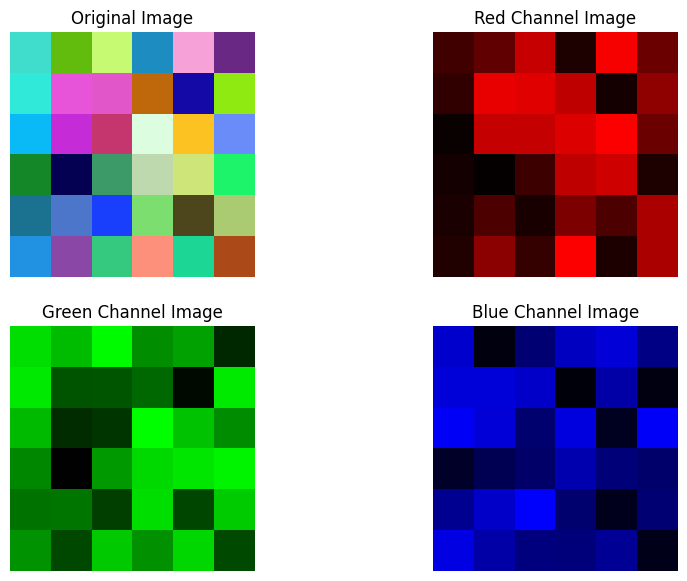

In [ ]:
visualize_RGB_channel(imgArray=random_colored_img)

###Understanding Filters

In [ ]:
sobel = np.array([[1, 0, -1],
                  [2, 0, -2],
                  [1, 0, -1]])
print("Highlighting Vertical Images: \n", sobel)

Highlighting Vertical Images: 
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [ ]:
print("Highlighting Horizontal Images: \n", sobel.T)

Highlighting Horizontal Images: 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [ ]:
example1 = [
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,255,255,255,255],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
    [0,0,0,0,255,255,255,255,0,0,0,0],
            ]

example1 = np.array(example1)

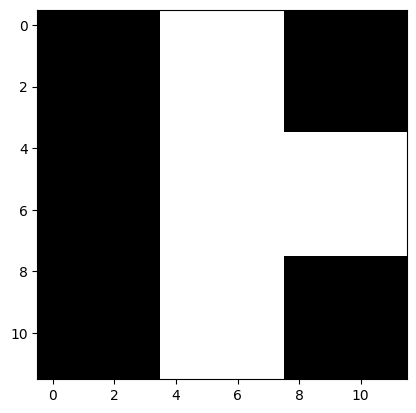

In [ ]:
plt.imshow(example1, cmap='gray')